# Project
#### This project is to get the windfarm data from accross ireland
#### Windfarm data is getting from 
##### https://cms.eirgrid.ie/sites/default/files/publications/System-Data-Qtr-Hourly-2025.xlsx
##### https://cms.eirgrid.ie/sites/default/files/2025-02/System_Data_Qtr_Hourly_2024.xlsx
##### https://cms.eirgrid.ie/sites/default/files/publications/System-Data-Qtr-Hourly-2022-2023_0.xlsx
##### https://cms.eirgrid.ie/sites/default/files/publications/System-Data-Qtr-Hourly-2020-2021.xlsx
##### https://cms.eirgrid.ie/sites/default/files/publications/System-Data-Qtr-Hourly-2018-2019.xlsx
##### https://cms.eirgrid.ie/sites/default/files/publications/System-Data-Qtr-Hourly-2016-2017.xlsx
##### https://cms.eirgrid.ie/sites/default/files/publications/System-Data-Qtr-Hourly-2014-2015.xlsx

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Get data from excel files from EirGrid website
df_2025 = pd.read_excel('https://cms.eirgrid.ie/sites/default/files/publications/System-Data-Qtr-Hourly-2025-v10.xlsx', index_col=0)
df_2024 = pd.read_excel('https://cms.eirgrid.ie/sites/default/files/publications/System-Data-Qtr-Hourly-2024.xlsx', index_col=0)
df_2022 = pd.read_excel('https://cms.eirgrid.ie/sites/default/files/publications/System-Data-Quarter-Hourly-2022-2023.xlsx', index_col=0)
df_2020 = pd.read_excel('https://cms.eirgrid.ie/sites/default/files/publications/System-Data-Qtr-Hourly-2020-2021.xlsx', index_col=0)
df_2018 = pd.read_excel('https://cms.eirgrid.ie/sites/default/files/publications/System-Data-Qtr-Hourly-2018-2019.xlsx', index_col=0)
df_2016 = pd.read_excel('https://cms.eirgrid.ie/sites/default/files/publications/System-Data-Qtr-Hourly-2016-2017.xlsx', index_col=0)
df_2014 = pd.read_excel('https://cms.eirgrid.ie/sites/default/files/publications/System-Data-Qtr-Hourly-2014-2015.xlsx', index_col=0)

In [5]:
# Removed unnamed column from data frame
df_2022
df_2025 = df_2025.loc[:, ~df_2025.columns.str.contains('^Unnamed')]
df_2024 = df_2024.loc[:, ~df_2024.columns.str.contains('^Unnamed')]
df_2022 = df_2022.loc[:, ~df_2022.columns.str.contains('^Unnamed')]
df_2020 = df_2020.loc[:, ~df_2020.columns.str.contains('^Unnamed')]
df_2018 = df_2018.loc[:, ~df_2018.columns.str.contains('^Unnamed')]
df_2016 = df_2016.loc[:, ~df_2016.columns.str.contains('^Unnamed')]
df_2014 = df_2014.loc[:, ~df_2014.columns.str.contains('^Unnamed')]


In [6]:
# Merge all data in one data frame
df = pd.concat([df_2014, df_2016, df_2018, df_2020, df_2022, df_2024, df_2025])
df.head(5)

,GMT Offset,NI Generation,NI Demand,NI Wind Availability,NI Wind Generation,IE Generation,IE Demand,IE Wind Availability,IE Wind Generation,SNSP,...,AI Solar Availability,AI Solar Generation,AI Hydro,Inter-Jurisdictional Flow,AI Wind Penetration,AI Solar Penetration,AI Oversupply,AI Oversupply Percentage,NI: Northern Ireland \nIE: Ireland \nAI: All Island,"For queries relating this report, please contact: RenewableReports@EirGrid.com\nNI: Northern Ireland \nIE: Ireland \nAI: All Island"
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,0,637.98,859.36,367.58,365.57,2752.48,2898.72,1053.11,1020.23,0.4579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 00:15:00,0,625.68,855.46,345.94,352.82,2733.59,2868.97,1021.59,995.07,0.4505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 00:30:00,0,614.72,840.00,333.22,339.60,2686.17,2826.42,972.06,932.71,0.4383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 00:45:00,0,588.73,824.25,307.44,313.66,2657.56,2786.94,985.81,959.06,0.4447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,0,593.06,818.84,306.87,315.17,2584.65,2723.94,958.63,920.82,0.4429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Get list of columns in data frame to removed unwanted columns
df.columns.to_list()

['GMT Offset',
 'NI Generation',
 'NI Demand',
 'NI Wind Availability',
 'NI Wind Generation',
 'IE Generation',
 'IE Demand',
 'IE Wind Availability',
 'IE Wind Generation',
 'SNSP',
 'NI: Northern Ireland\nIE: Ireland',
 'NI Solar Availability',
 'NI Solar Generation',
 'Moyle I/C',
 'NI Wind Penetration',
 'NI Solar Penetration',
 'IE Solar Availability',
 'IE Solar Generation',
 'IE Hydro',
 'EWIC I/C',
 'IE Wind Penetration',
 'IE Solar Penetration',
 'AI Generation',
 'AI Demand',
 'AI Wind Availability',
 'AI Wind Generation',
 'AI Solar Availability',
 'AI Solar Generation',
 'AI Hydro',
 'Inter-Jurisdictional Flow',
 'AI Wind Penetration',
 'AI Solar Penetration',
 'AI Oversupply',
 'AI Oversupply Percentage',
 'NI: Northern Ireland \nIE: Ireland \nAI: All Island ',
 'For queries relating this report, please contact: RenewableReports@EirGrid.com\nNI: Northern Ireland \nIE: Ireland \nAI: All Island ']

In [8]:
# removed unwanted columns that are not needed
df = df.drop(columns=['GMT Offset', 'NI Generation', 'NI Demand', 'NI Wind Availability', 'NI Wind Generation','SNSP', 'NI: Northern Ireland\nIE: Ireland', 'NI Solar Availability', 'NI Solar Generation', 'Moyle I/C', 'NI Wind Penetration', 'NI Solar Penetration','EWIC I/C','AI Generation', 'AI Demand', 'AI Wind Availability', 'AI Wind Generation', 'AI Solar Availability', 'AI Solar Generation', 'AI Hydro', 'Inter-Jurisdictional Flow', 'AI Wind Penetration', 'AI Solar Penetration', 'AI Oversupply', 'AI Oversupply Percentage', 'NI: Northern Ireland \nIE: Ireland \nAI: All Island ','For queries relating this report, please contact: RenewableReports@EirGrid.com\nNI: Northern Ireland \nIE: Ireland \nAI: All Island '])
df.head(5)

,IE Generation,IE Demand,IE Wind Availability,IE Wind Generation,IE Solar Availability,IE Solar Generation,IE Hydro,IE Wind Penetration,IE Solar Penetration
DateTime,,,,,,,,,
2014-01-01 00:00:00,2752.48,2898.72,1053.11,1020.23,NaN,NaN,NaN,NaN,NaN
2014-01-01 00:15:00,2733.59,2868.97,1021.59,995.07,NaN,NaN,NaN,NaN,NaN
2014-01-01 00:30:00,2686.17,2826.42,972.06,932.71,NaN,NaN,NaN,NaN,NaN
2014-01-01 00:45:00,2657.56,2786.94,985.81,959.06,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,2584.65,2723.94,958.63,920.82,NaN,NaN,NaN,NaN,NaN


In [18]:
# Convert NaN values to 0
df = df.fillna(0)
df.head(5)

,IE Generation,IE Demand,IE Wind Availability,IE Wind Generation,IE Solar Availability,IE Solar Generation,IE Hydro,IE Wind Penetration,IE Solar Penetration,energysurplus,year,month,IE Other Generation
DateTime,,,,,,,,,,,,,
2014-01-01 00:00:00,2752.48,2898.72,1053.11,1020.23,0.0,0.0,0.0,0.0,0.0,-146.24,2014,2014-01,0.0
2014-01-01 00:15:00,2733.59,2868.97,1021.59,995.07,0.0,0.0,0.0,0.0,0.0,-135.38,2014,2014-01,0.0
2014-01-01 00:30:00,2686.17,2826.42,972.06,932.71,0.0,0.0,0.0,0.0,0.0,-140.25,2014,2014-01,0.0
2014-01-01 00:45:00,2657.56,2786.94,985.81,959.06,0.0,0.0,0.0,0.0,0.0,-129.38,2014,2014-01,0.0
2014-01-01 01:00:00,2584.65,2723.94,958.63,920.82,0.0,0.0,0.0,0.0,0.0,-139.29,2014,2014-01,0.0


In [19]:
# calculate the energy generation againest demand to get surplus/deficit
df['energysurplus'] = df['IE Generation'] - df['IE Demand']
df.head(5)

,IE Generation,IE Demand,IE Wind Availability,IE Wind Generation,IE Solar Availability,IE Solar Generation,IE Hydro,IE Wind Penetration,IE Solar Penetration,energysurplus,year,month,IE Other Generation
DateTime,,,,,,,,,,,,,
2014-01-01 00:00:00,2752.48,2898.72,1053.11,1020.23,0.0,0.0,0.0,0.0,0.0,-146.24,2014,2014-01,0.0
2014-01-01 00:15:00,2733.59,2868.97,1021.59,995.07,0.0,0.0,0.0,0.0,0.0,-135.38,2014,2014-01,0.0
2014-01-01 00:30:00,2686.17,2826.42,972.06,932.71,0.0,0.0,0.0,0.0,0.0,-140.25,2014,2014-01,0.0
2014-01-01 00:45:00,2657.56,2786.94,985.81,959.06,0.0,0.0,0.0,0.0,0.0,-129.38,2014,2014-01,0.0
2014-01-01 01:00:00,2584.65,2723.94,958.63,920.82,0.0,0.0,0.0,0.0,0.0,-139.29,2014,2014-01,0.0


In [20]:
# get the year from the index and add it as a new column
df['year'] = df.index.year
df.head(5)

,IE Generation,IE Demand,IE Wind Availability,IE Wind Generation,IE Solar Availability,IE Solar Generation,IE Hydro,IE Wind Penetration,IE Solar Penetration,energysurplus,year,month,IE Other Generation
DateTime,,,,,,,,,,,,,
2014-01-01 00:00:00,2752.48,2898.72,1053.11,1020.23,0.0,0.0,0.0,0.0,0.0,-146.24,2014,2014-01,0.0
2014-01-01 00:15:00,2733.59,2868.97,1021.59,995.07,0.0,0.0,0.0,0.0,0.0,-135.38,2014,2014-01,0.0
2014-01-01 00:30:00,2686.17,2826.42,972.06,932.71,0.0,0.0,0.0,0.0,0.0,-140.25,2014,2014-01,0.0
2014-01-01 00:45:00,2657.56,2786.94,985.81,959.06,0.0,0.0,0.0,0.0,0.0,-129.38,2014,2014-01,0.0
2014-01-01 01:00:00,2584.65,2723.94,958.63,920.82,0.0,0.0,0.0,0.0,0.0,-139.29,2014,2014-01,0.0


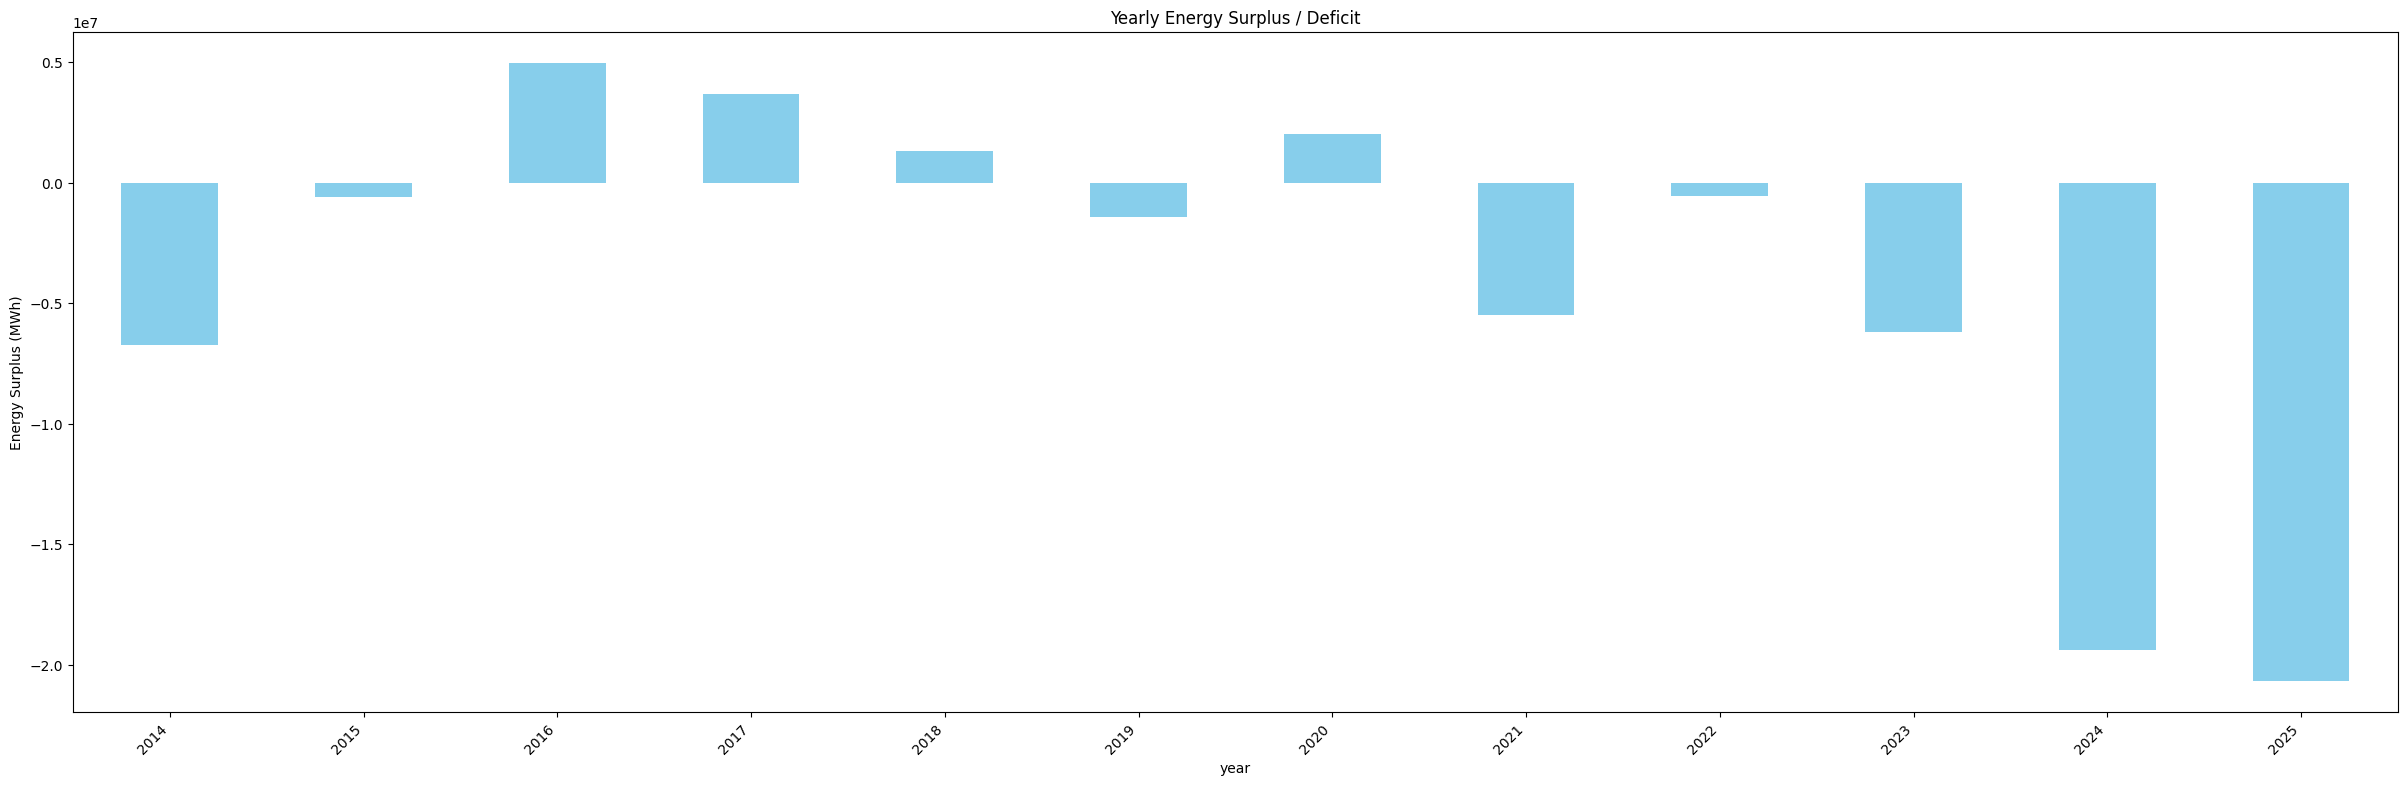

In [21]:
# plot the bar chart of energy surplus year wise
# get the sum of energy surplus for each year using groupby function
yearly_surplus = df.groupby('year')['energysurplus'].sum()
# plot the bar chart
plt.figure(figsize=(30,10))
yearly_surplus.plot(kind='bar', color='skyblue')
plt.title('Yearly Energy Surplus / Deficit')
plt.xlabel('year')
plt.ylabel('Energy Surplus (MWh)')
plt.gcf().autofmt_xdate(rotation=45)

In [22]:
# Get the data for the year and month wise
# Get year and month from the date index
df['month'] =  df.index.year.astype(dtype='str') + "-" + df.index.strftime('%m').astype(dtype='str')
df.head(5)

,IE Generation,IE Demand,IE Wind Availability,IE Wind Generation,IE Solar Availability,IE Solar Generation,IE Hydro,IE Wind Penetration,IE Solar Penetration,energysurplus,year,month,IE Other Generation
DateTime,,,,,,,,,,,,,
2014-01-01 00:00:00,2752.48,2898.72,1053.11,1020.23,0.0,0.0,0.0,0.0,0.0,-146.24,2014,2014-01,0.0
2014-01-01 00:15:00,2733.59,2868.97,1021.59,995.07,0.0,0.0,0.0,0.0,0.0,-135.38,2014,2014-01,0.0
2014-01-01 00:30:00,2686.17,2826.42,972.06,932.71,0.0,0.0,0.0,0.0,0.0,-140.25,2014,2014-01,0.0
2014-01-01 00:45:00,2657.56,2786.94,985.81,959.06,0.0,0.0,0.0,0.0,0.0,-129.38,2014,2014-01,0.0
2014-01-01 01:00:00,2584.65,2723.94,958.63,920.82,0.0,0.0,0.0,0.0,0.0,-139.29,2014,2014-01,0.0


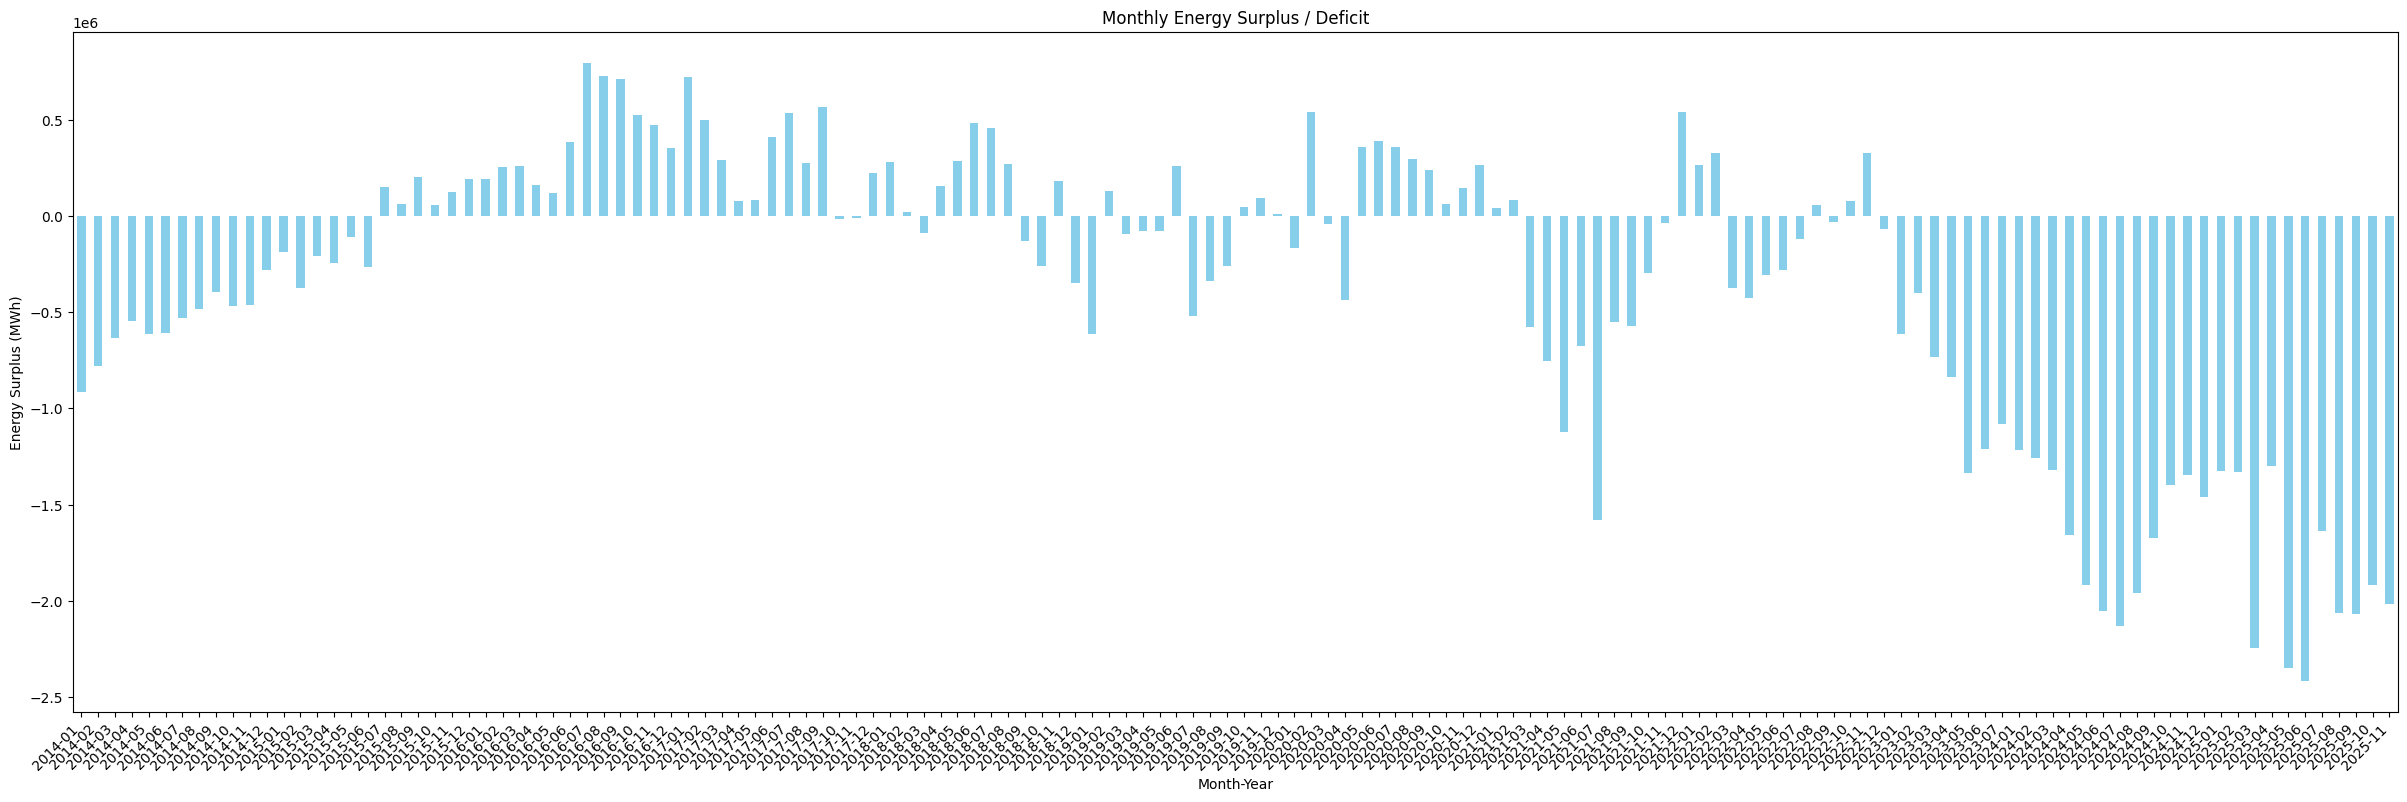

In [23]:
# plot the bar chart of energy surplus Month Year wise
# get the sum of energy surplus for each Month year using groupby function
monthly_surplus = df.groupby('month')['energysurplus'].sum()
# plot the bar chart
plt.figure(figsize=(30,10))
monthly_surplus.plot(kind='bar', color='skyblue')
plt.title('Monthly Energy Surplus / Deficit')
plt.xlabel('Month-Year')
plt.ylabel('Energy Surplus (MWh)')
plt.gcf().autofmt_xdate(rotation=45)
#plt.tight_layout()

In [24]:
# get energy generation from other sources
df['IE Other Generation'] = df['IE Generation'] - (df['IE Wind Generation'] + df['IE Solar Generation'] + df['IE Hydro'])
df.head(5)

,IE Generation,IE Demand,IE Wind Availability,IE Wind Generation,IE Solar Availability,IE Solar Generation,IE Hydro,IE Wind Penetration,IE Solar Penetration,energysurplus,year,month,IE Other Generation
DateTime,,,,,,,,,,,,,
2014-01-01 00:00:00,2752.48,2898.72,1053.11,1020.23,0.0,0.0,0.0,0.0,0.0,-146.24,2014,2014-01,1732.25
2014-01-01 00:15:00,2733.59,2868.97,1021.59,995.07,0.0,0.0,0.0,0.0,0.0,-135.38,2014,2014-01,1738.52
2014-01-01 00:30:00,2686.17,2826.42,972.06,932.71,0.0,0.0,0.0,0.0,0.0,-140.25,2014,2014-01,1753.46
2014-01-01 00:45:00,2657.56,2786.94,985.81,959.06,0.0,0.0,0.0,0.0,0.0,-129.38,2014,2014-01,1698.50
2014-01-01 01:00:00,2584.65,2723.94,958.63,920.82,0.0,0.0,0.0,0.0,0.0,-139.29,2014,2014-01,1663.83


In [25]:
# create a pie chart of energy source contribution to total generation
yearly_generation_type = df.groupby(df['year'])[['IE Wind Generation','IE Solar Generation','IE Hydro','IE Other Generation']].sum()
yearly_generation_type


,IE Wind Generation,IE Solar Generation,IE Hydro,IE Other Generation
year,,,,
2014,20233299.98,0.00,0.00,76136531.74
2015,26144840.04,0.00,0.00,79559239.38
2016,24245953.38,0.00,0.00,89342320.44
2017,28911912.73,0.00,0.00,85731792.25
2018,34734355.58,0.00,0.00,82181764.92
2019,37986052.64,0.00,0.00,76912185.75
2020,44281518.05,0.00,0.00,75067053.30
2021,38026776.98,0.00,0.00,80157197.28
2022,43517816.84,0.00,2563731.84,79861954.08


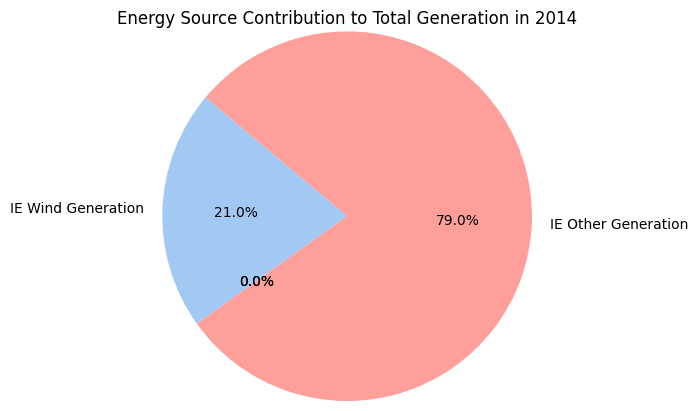

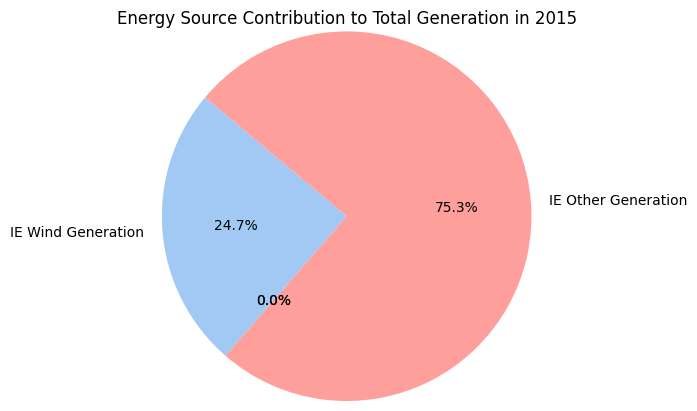

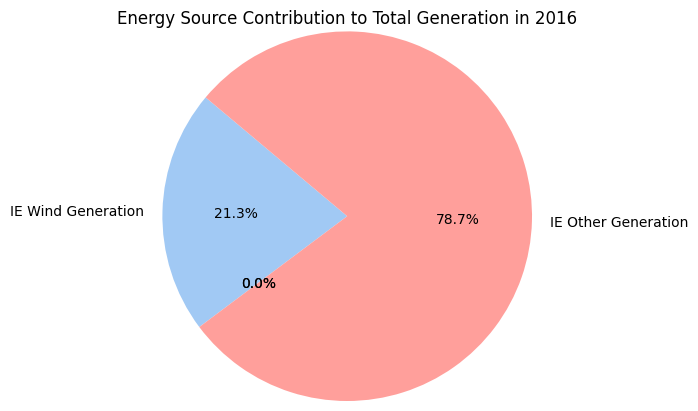

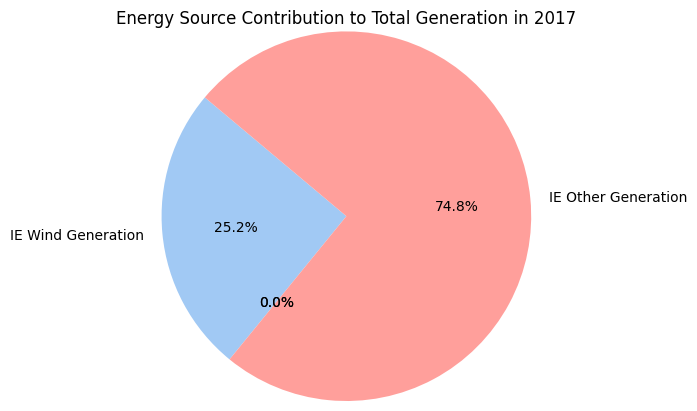

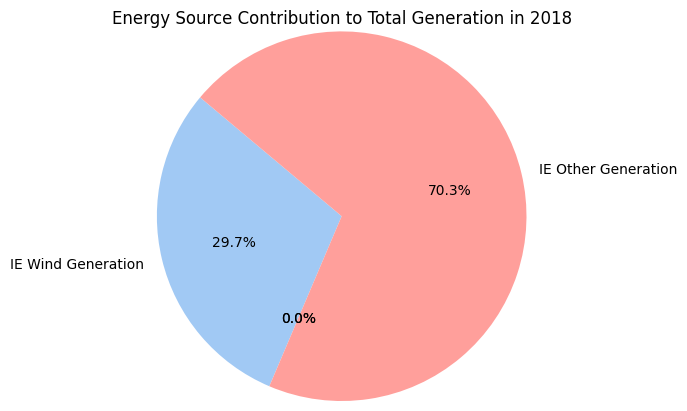

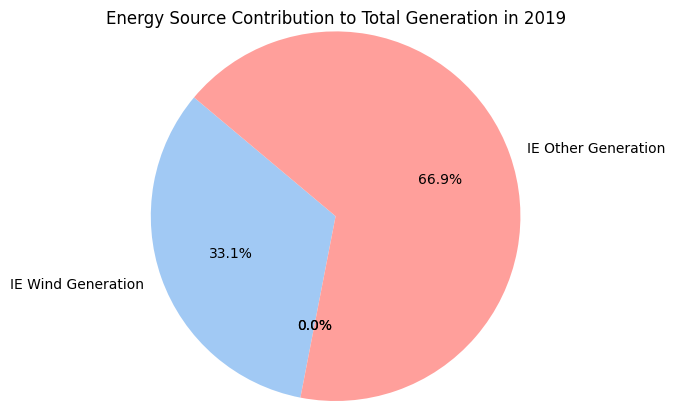

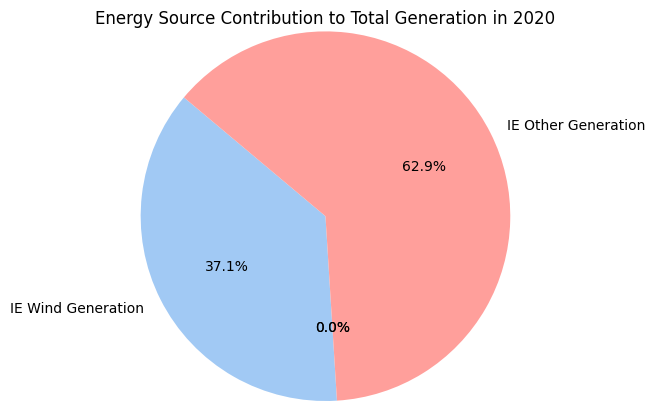

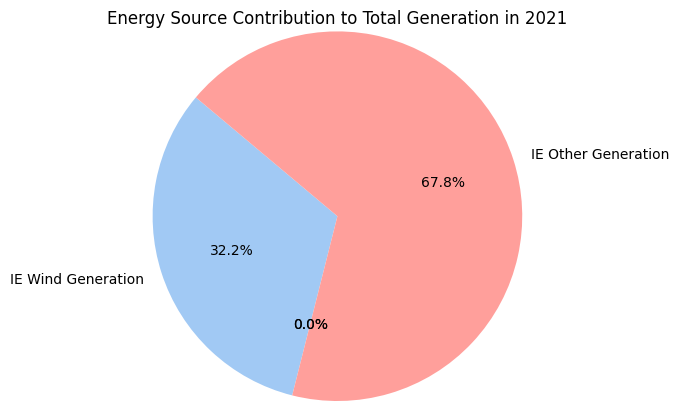

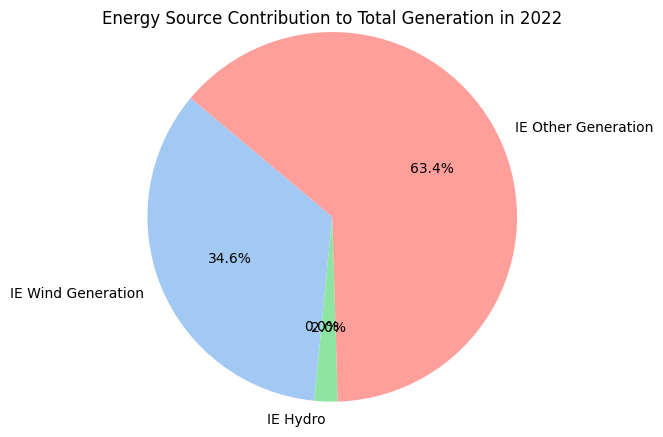

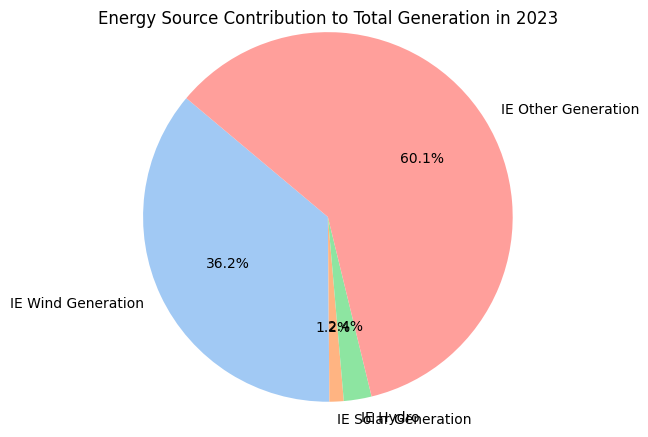

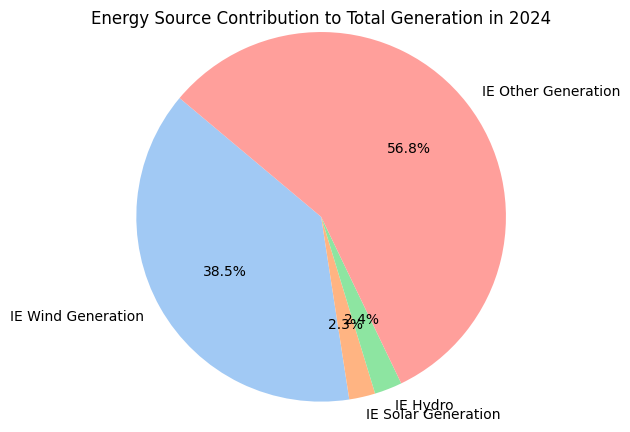

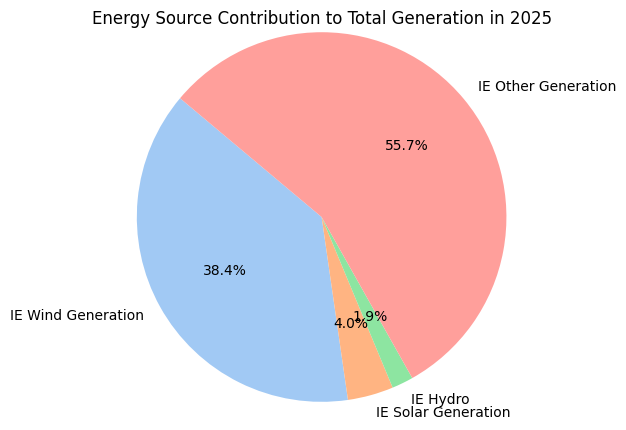

In [29]:

yearly_generation_type.loc[2014].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Energy Source Contribution to Total Generation in 2014')
plt.ylabel('')
plt.autoscale(enable=True,tight=True)
plt.show()
yearly_generation_type.loc[2015].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Energy Source Contribution to Total Generation in 2015')
plt.ylabel('')
plt.autoscale(enable=True,tight=True)
plt.show()
yearly_generation_type.loc[2016].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Energy Source Contribution to Total Generation in 2016')
plt.ylabel('')
plt.autoscale(enable=True,tight=True)
plt.show()
yearly_generation_type.loc[2017].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Energy Source Contribution to Total Generation in 2017')
plt.ylabel('')
plt.autoscale(enable=True,tight=True)
plt.ylabel('')
plt.autoscale(enable=True,tight=True)
plt.show()
yearly_generation_type.loc[2018].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Energy Source Contribution to Total Generation in 2018')
plt.ylabel('')
plt.autoscale(enable=True,tight=True)
plt.show()
yearly_generation_type.loc[2019].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Energy Source Contribution to Total Generation in 2019')
plt.ylabel('')
plt.autoscale(enable=True,tight=True)
plt.show()
yearly_generation_type.loc[2020].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Energy Source Contribution to Total Generation in 2020')
plt.ylabel('')
plt.autoscale(enable=True,tight=True)
plt.show()
yearly_generation_type.loc[2021].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Energy Source Contribution to Total Generation in 2021')
plt.ylabel('')
plt.autoscale(enable=True,tight=True)
plt.show()
yearly_generation_type.loc[2022].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Energy Source Contribution to Total Generation in 2022')
plt.ylabel('')
plt.autoscale(enable=True,tight=True)
plt.show()
yearly_generation_type.loc[2023].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Energy Source Contribution to Total Generation in 2023')
plt.ylabel('')
plt.autoscale(enable=True,tight=True)
plt.show()
yearly_generation_type.loc[2024].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Energy Source Contribution to Total Generation in 2024')
plt.ylabel('')
plt.autoscale(enable=True,tight=True)
plt.show()
yearly_generation_type.loc[2025].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Energy Source Contribution to Total Generation in 2025')
plt.ylabel('')
plt.autoscale(enable=True,tight=True)
plt.show()